In [1]:
import pandas as pd
chiBB = pd.read_csv('/home/const/MEGA/Physics/GrabbedFigures/LiuRapp2021/chiBB.csv')

In [2]:
import TMQGP as tm
import QuarkTM

In [3]:
import matplotlib
matplotlib.style.use('publication')
import os

In [4]:
import h5py

In [5]:
from numpy import *

In [6]:
murange = array([0, 0.2, 0.4, 0.6])

In [7]:
folder = '4ch_XHI/'

In [8]:
fnames = ['data.hdf5', 'data_02.hdf5', 'data_04.hdf5', 'data_06.hdf5']

In [9]:
folder2 = '4ch_HI/'

In [10]:
fnames2 = ['0.00/data.hdf5', '0.20/data.hdf5', '0.40/data.hdf5', '0.60/data.hdf5']

In [11]:
df_xhi = h5py.File('4ch_XXHI/0.00/data_single_170.hdf5')


In [12]:
dfs = [h5py.File(folder+fname) for fname in fnames] 

In [13]:
dfs2 = [h5py.File(folder2+fname) for fname in fnames2] 

In [14]:
Trange = dfs[0].attrs['Trange']
Tkeys = list(dfs[0].keys())

In [15]:
erange = dfs[0]['170'].attrs['erange']
erange2 = dfs2[0]['170'].attrs['erange']

qrange1 = dfs[0]['170'].attrs['qrange']
qrange2 = dfs2[0]['170'].attrs['qrange']

In [16]:
GG = array(dfs[0]['170']['Q']['G'])

In [17]:
GG2 = array(dfs2[0]['170']['Q']['G'])

In [18]:
GG3 = array(df_xhi['Q']['G'])

In [19]:
erange3 = df_xhi.attrs['erange']

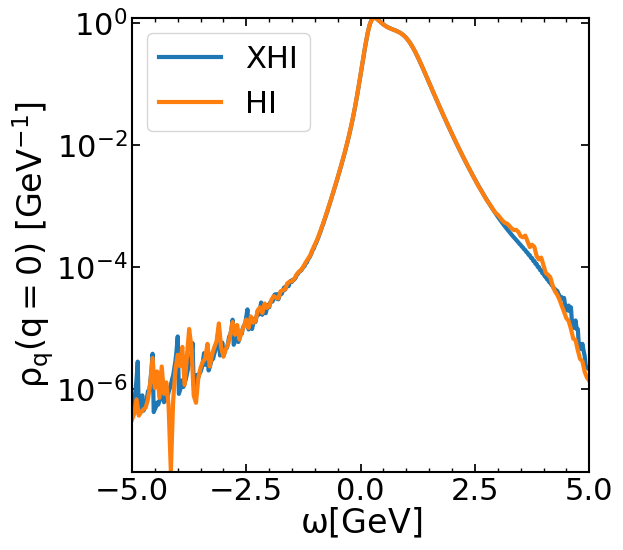

In [23]:
plt.plot(erange, -imag(GG[:,0])/pi, label='XHI')
plt.plot(erange2, -imag(GG2[:,0])/pi, label='HI')
# plt.plot(erange3, -imag(GG3[:,0]), ls='--')

plt.ylabel(r'$\rho_q(q = 0)$ [GeV$^{-1}$]')
plt.xlabel('$\omega [GeV]$')
plt.semilogy()

plt.legend()

# plt.savefig('rho_q_log.pdf', bbox_inches='tight')

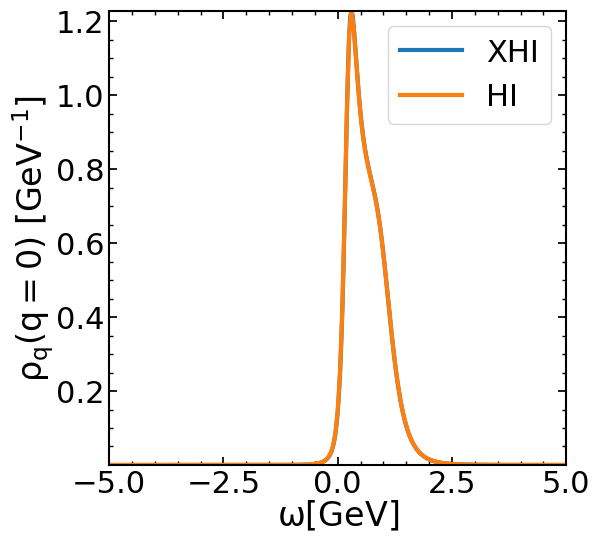

In [24]:
plt.plot(erange, -imag(GG[:,0])/pi, label='XHI')
plt.plot(erange2, -imag(GG2[:,0])/pi, label='HI')
# plt.plot(erange3, -imag(GG3[:,0]), ls='--')

plt.ylabel(r'$\rho_q(q = 0)$ [GeV$^{-1}$]')
plt.xlabel('$\omega [GeV]$')
# plt.semilogy()

plt.legend()

plt.savefig('rho_q.pdf', bbox_inches='tight')

In [25]:
Ps_mu = []

for df in dfs:
    Ps = []
    for Tkey in Tkeys:
        Ps += [float(df[Tkey].attrs['Ptot'])]
    Ps_mu += [Ps]

Ps_mu = array(Ps_mu)

/tmp/ipykernel_16397/3111885847.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Ps += [float(df[Tkey].attrs['Ptot'])]


In [26]:
Ps_mu2 = []

for df in dfs2:
    Ps = []
    for Tkey in Tkeys:
        Ps += [float(df[Tkey].attrs['Ptot'])]
    Ps_mu2 += [Ps]

Ps_mu2 = array(Ps_mu2)

/tmp/ipykernel_16397/2035621139.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Ps += [float(df[Tkey].attrs['Ptot'])]


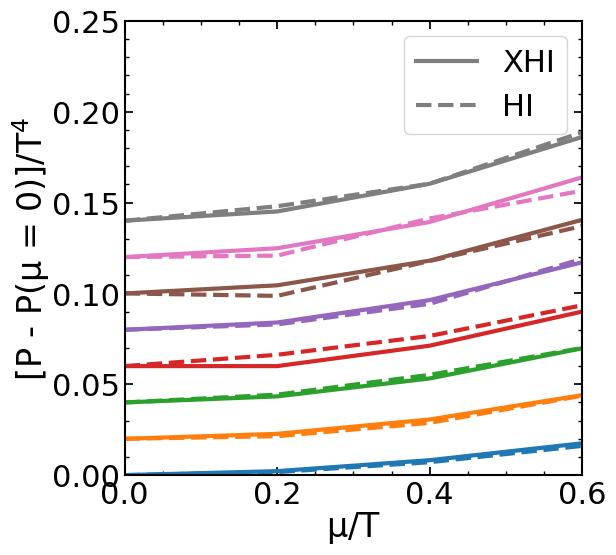

In [27]:

lines = []
for _ in range(8):
    T = Trange[_]
        
    shift = 0.02*_
    l, = plt.plot(murange, shift + (Ps_mu[:, _] - Ps_mu[0, _])/T**4, label='T=%.2f'%(T))
    l2, = plt.plot(murange, shift + (Ps_mu2[:, _] - Ps_mu2[0, _])/T**4, ls='--', c=l.get_c())

    lines += [l]
    # plt.plot(murange, shift + fit_func(sol.x, murange), ls='--', c=l.get_c())
    
    # chis += [sol.x]
plt.legend(fontsize=14)

plt.xlabel('$\mu/T$')
plt.ylabel('[P - P($\mu$ = 0)]/T$^4$')
# plt.savefig('Pmu_fit.pdf', bbox_inches='tight')

plt.ylim(0, 0.25)

# leg = plt.legend(lines, ['%.2f'%T for T in Trange], bbox_to_anchor = [1.2, 1.05], loc='upper right')
# plt.gca().add_artist(leg)

plt.legend([l, l2], ['XHI', 'HI'])
# plt.tight_layout()

plt.savefig('Ps_mu_compare.pdf', bbox_inches='tight')

In [28]:
Ps_mu[:, 0]/Trange[0]**4

array([0.85146217, 0.85367017, 0.85968623, 0.86897502])

In [29]:
Ps_mu2[:, 0]/Trange[0]**4

array([0.85285615, 0.85453658, 0.85997421, 0.86893922])

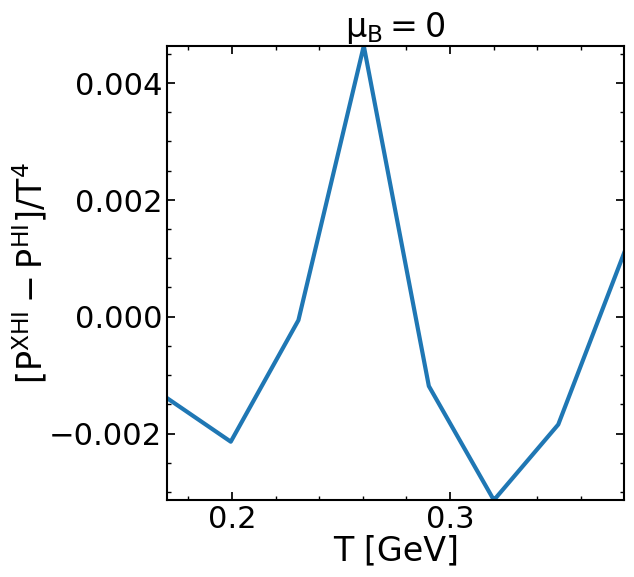

In [30]:
plt.plot(Trange, (Ps_mu[0, :] - Ps_mu2[0, :]) / Trange**4)
plt.ylabel(r'$[P^{XHI} - P^{HI}]/T^4$')
plt.xlabel(r'T [GeV]')
plt.title(r'$\mu_B = 0$')

plt.savefig('Pdiff_mu0.pdf', bbox_inches='tight')

## Compare SFs

In [31]:
i = 0
i_T = 0
i_q2 = 0
i_q1 = 4 * i_q2
T = Trange[i_T]
murange[i], Trange[i_T], qrange1[i_q1], qrange2[i_q2], T

(0.0, 0.170253, 0.0, 0.0, 0.170253)

In [32]:
df1 = dfs[i][Tkeys[i_T]]
df2 = dfs2[i][Tkeys[i_T]]
df3 = df_xhi

In [33]:
df2.attrs['T']

0.170253

In [34]:
R1 = df1['Q']['R']
R2 = df2['Q']['R']
R3 = df3['Q']['R']
S1 = df1['Q']['S']
S2 = df2['Q']['S']
S3 = df3['Q']['S']

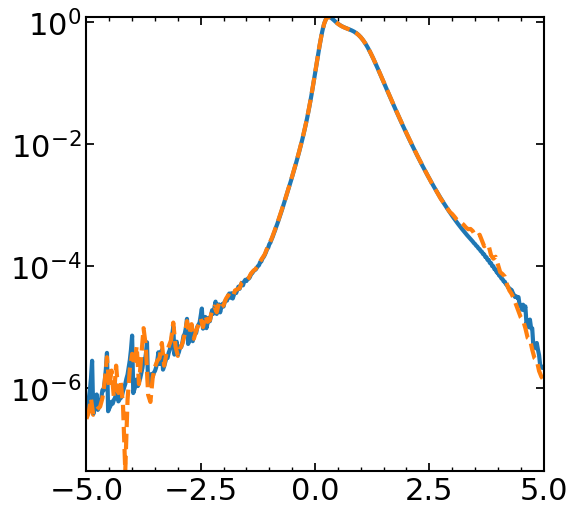

In [35]:
plt.plot(erange, R1[:, i_q1])
plt.semilogy(erange2, R2[:, i_q2], ls='--')
# plt.plot(erange3, R3[:, 2*i_q1])



[]

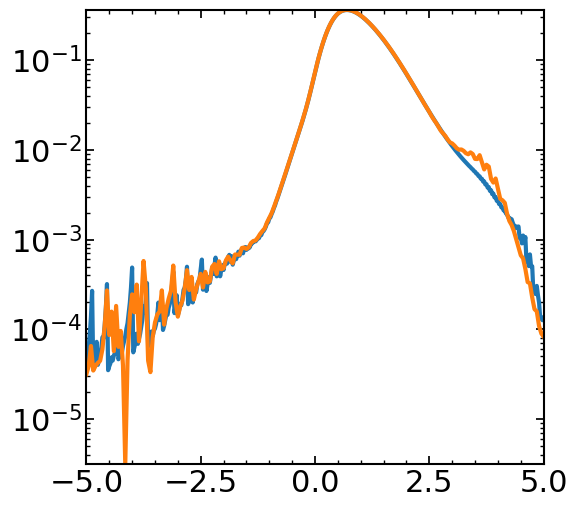

In [37]:
plt.plot(erange, -imag(S1[:, i_q1]))
plt.plot(erange2, -imag(S2[:, i_q2]))
plt.semilogy()

# plt.savefig()

In [38]:
tm1 = df1['TM']['qa1']['0']
tm2 = df2['TM']['qa1']['0']

(0.01, 1000)

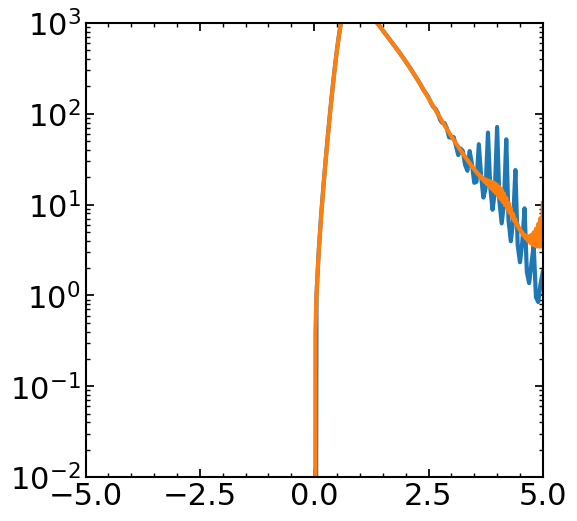

In [39]:
plt.plot(erange2, -imag(tm2[:, 0]))
plt.plot(erange, -imag(tm1[:, 0]))
plt.semilogy()

plt.ylim(0.01, 1000)

## Recalculating $\Sigma$ to check the bump

In [40]:
tm1 = array(df1['TM']['qa1']['0'])
tm2 = array(df2['TM']['qa1']['0'])

tm1_1 = array(df1['TM']['qa1']['0'])
tm2_1 = array(df2['TM']['qa1']['0'])

tm1_1[erange < 0] = real(tm1_1[erange < 0])
tm2_1[erange2 < 0] = real(tm2_1[erange2 < 0])

iImTM1 = tm.Interpolator2D(qrange1, erange, ascontiguousarray(imag(tm1)))
iImTM2 = tm.Interpolator2D(qrange2, erange2, ascontiguousarray(imag(tm2)))

iImTM1_1 = tm.Interpolator2D(qrange1, erange, ascontiguousarray(imag(tm1_1)))
iImTM2_1 = tm.Interpolator2D(qrange2, erange2, ascontiguousarray(imag(tm2_1)))

In [41]:
mQ = df1.attrs['mQ']

In [42]:
eps1 = sqrt(mQ**2 + qrange1**2)
iEps1 = tm.Interpolator(qrange1, eps1, 'cubic')

eps2 = sqrt(mQ**2 + qrange2**2)
iEps2 = tm.Interpolator(qrange2, eps2, 'cubic')

In [43]:
iR1 = tm.Interpolator2D(qrange1, erange, ascontiguousarray(imag(-1/pi*array(df1['Q']['G']))))
iR2 = tm.Interpolator2D(qrange2, erange2, ascontiguousarray(imag(-1/pi*array(df2['Q']['G']))))

In [44]:
s1 = array([tm.sigma_ff_onshell(e, 0, T, iImTM1, iR1, iEps1, iEps1) for e in erange])

In [45]:
s2 = array([tm.sigma_ff_onshell(e, 0, T, iImTM2, iR2, iEps2, iEps2) for e in erange])

In [46]:
# Take iEps from XHI calculation
s2_2 = array([tm.sigma_ff_onshell(e, 0, T, iImTM2, iR2, iEps1, iEps1) for e in erange])

# nothing changed

In [47]:
# Take R from XHI calculation
s2_3 = array([tm.sigma_ff_onshell(e, 0, T, iImTM2, iR1, iEps1, iEps1) for e in erange])

# nothing changed

In [48]:
# Take TM from XHI calculation
s2_4 = array([tm.sigma_ff_onshell(e, 0, T, iImTM1, iR2, iEps1, iEps1) for e in erange])

# nothing changed

In [49]:
s2_3_noneg = array([tm.sigma_ff_onshell(e, 0, T, iImTM2_1, iR1, iEps1, iEps1) for e in erange])


In [50]:
s2_4_allom = array([tm.sigma_ff_onshell_allom(e, 0, T, iImTM1, iR2, iEps1, iEps1, 0) for e in erange])


Text(0, 0.5, '$Im\\Sigma$')

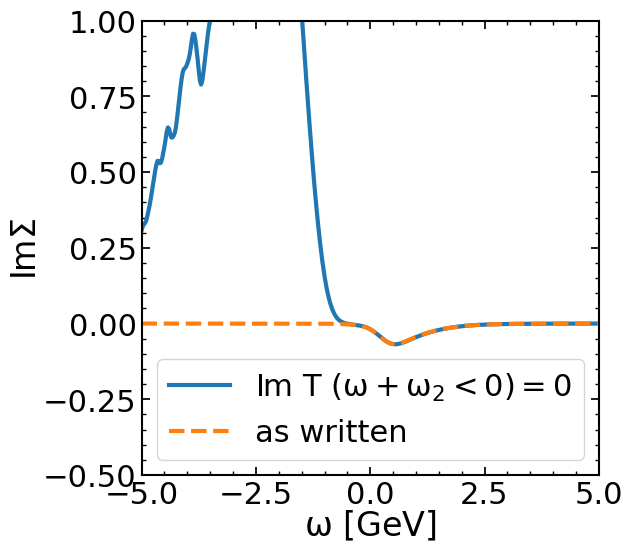

In [51]:
plt.plot(erange, s2_4_allom, label='Im T ($\omega + \omega_2 < 0) = 0$')
plt.plot(erange, s1, ls='--', label='as written')

plt.legend()
plt.ylim(-0.5, 1)

plt.xlabel('$\omega$ [GeV]')
plt.ylabel('$Im\Sigma$')

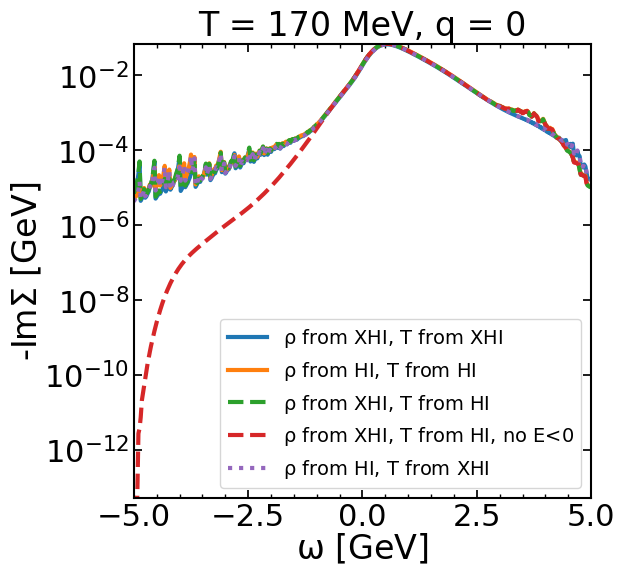

In [52]:
plt.plot(erange, -s1, label=r'$\rho$ from XHI, T from XHI')
# plt.plot(erange, -s1, label=r'$\rho$ from HI, T from HI')
plt.plot(erange, -s2, label=r'$\rho$ from HI, T from HI')
# plt.plot(erange, -s2_2)
plt.plot(erange, -s2_3, ls='--', label=r'$\rho$ from XHI, T from HI')
plt.plot(erange, -s2_3_noneg, ls='--', label=r'$\rho$ from XHI, T from HI, no E<0')
plt.plot(erange, -s2_4, ls=':', label=r'$\rho$ from HI, T from XHI')
# plt.plot(erange, -s2_4_allom, ls=':')
plt.semilogy()

# plt.xlim(0, 5)
# plt.ylim( 1e-5, 1e-1)
plt.ylabel(r'-Im$\Sigma$ [GeV]')
plt.xlabel(r'$\omega$ [GeV]')

plt.legend(fontsize=14)
plt.title('T = 170 MeV, q = 0')

plt.savefig('ImS_noneg.pdf', bbox_inches='tight')

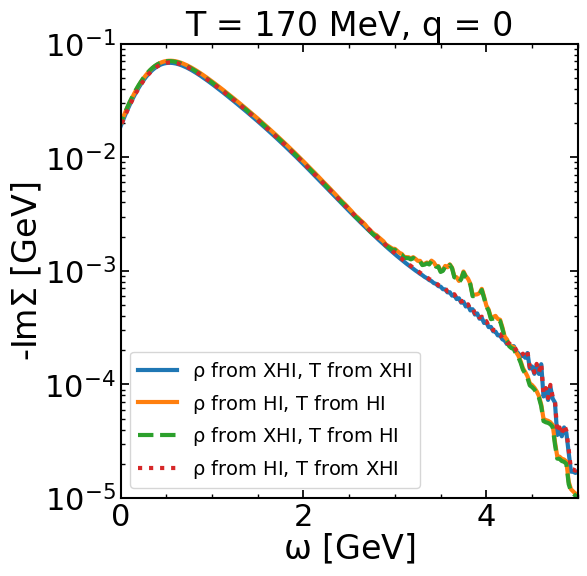

In [53]:
plt.plot(erange, -s1, label=r'$\rho$ from XHI, T from XHI')
# plt.plot(erange, -s1, label=r'$\rho$ from HI, T from HI')
plt.plot(erange, -s2, label=r'$\rho$ from HI, T from HI')
# plt.plot(erange, -s2_2)
plt.plot(erange, -s2_3, ls='--', label=r'$\rho$ from XHI, T from HI')
plt.plot(erange, -s2_4, ls=':', label=r'$\rho$ from HI, T from XHI')
# plt.plot(erange, -s2_4_allom, ls=':')
plt.semilogy()

plt.xlim(0, 5)
plt.ylim( 1e-5, 1e-1)
plt.ylabel(r'-Im$\Sigma$ [GeV]')
plt.xlabel(r'$\omega$ [GeV]')

plt.legend(fontsize=14)
plt.title('T = 170 MeV, q = 0')

plt.savefig('ImS_zoom.pdf', bbox_inches='tight')

Text(0.5, 1.0, 'T = 170 MeV, q = 0')

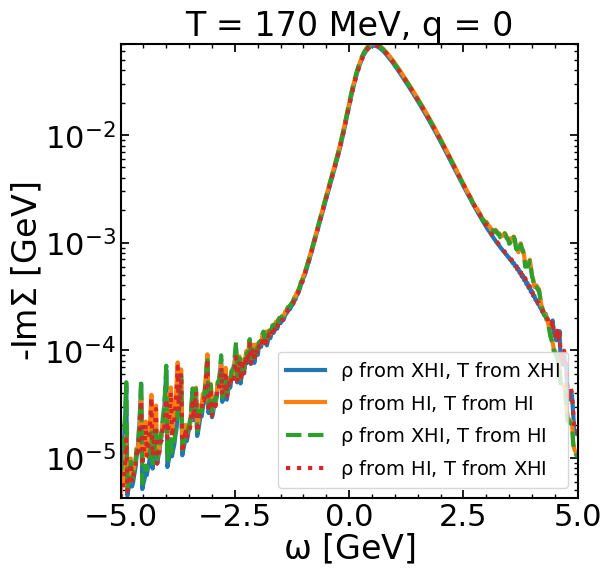

In [54]:
plt.plot(erange, -s1, label=r'$\rho$ from XHI, T from XHI')
# plt.plot(erange, -s1, label=r'$\rho$ from HI, T from HI')
plt.plot(erange, -s2, label=r'$\rho$ from HI, T from HI')
# plt.plot(erange, -s2_2)
plt.plot(erange, -s2_3, ls='--', label=r'$\rho$ from XHI, T from HI')
plt.plot(erange, -s2_4, ls=':', label=r'$\rho$ from HI, T from XHI')
# plt.plot(erange, -s2_4_allom, ls=':')
plt.semilogy()

# plt.xlim(0, 5)
# plt.ylim( 1e-5, 1e-1)
plt.ylabel(r'-Im$\Sigma$ [GeV]')
plt.xlabel(r'$\omega$ [GeV]')

plt.legend(fontsize=14)
plt.title('T = 170 MeV, q = 0')

## Reproduce the T-matrix in two resolutions

In [55]:
pt1 = QuarkTM.Particle(mQ, qrange1, erange, Gtab=array(df1['Q']['G']))
pt2 = QuarkTM.Particle(mQ, qrange2, erange2, Gtab=array(df2['Q']['G']))

In [56]:
df1.attrs['G'], df1.attrs['L'], df1.attrs['screen']

(14.0, 0.2, 0.0065)

In [57]:
ch1 = QuarkTM.Channel(pt1, pt1, T, G=df1.attrs['G'], L=df1.attrs['L'], screen=df1.attrs['screen'], expand=0)
ch2 = QuarkTM.Channel(pt2, pt2, T, G=df2.attrs['G'], L=df1.attrs['L'], screen=df1.attrs['screen'], expand=0)

100%|███████████████████████████████████████████████████████████████████████████████| 51/51 [00:00<00:00, 68.58it/s]


In [58]:
ch1.populate_T_fast()
ch2.populate_T_fast()

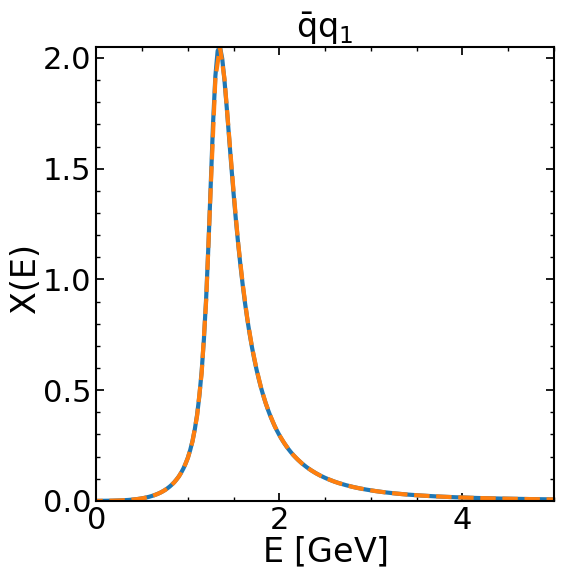

In [59]:
plt.plot(ch1.erange, imag(ch1.XS[0][:, 0]), label='XHI')
plt.plot(ch2.erange, imag(ch2.XS[0][:, 0]), label='HI', ls='--')
# plt.plot(erange2, imag(df2['X']['qa1']['0'][:, 0]))

plt.ylabel(r'X(E) ')
plt.xlabel(r'$E$ [GeV]')
# plt.ylim(0, 0.1)
plt.xlim(0, 5)

plt.title(r'$\bar q q_1$')

plt.savefig('XE.pdf', bbox_inches='tight')

In [60]:
df1['TM']

<HDF5 group "/170/TM" (4 members)>

Text(0.5, 1.0, '$\\bar q q_1$')

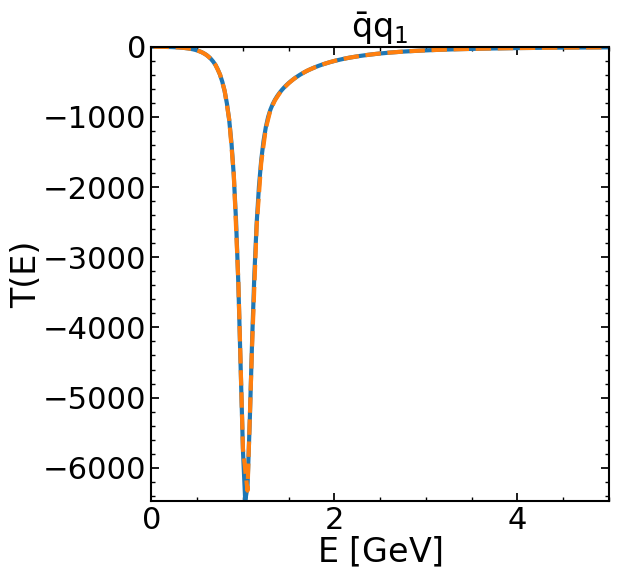

In [61]:
plt.plot(ch1.erange, imag(ch1.TM[:, 0]), label='XHI')
plt.plot(ch2.erange, imag(ch2.TM[:, 0]), label='HI', ls='--')

# plt.plot(erange2, imag(df2['TM']['qa1']['0'][:, 0]))

plt.ylabel(r'T(E)')
plt.xlabel(r'$E$ [GeV]')
# plt.ylim(0, 0.1)
plt.xlim(0, 5)

plt.title(r'$\bar q q_1$')

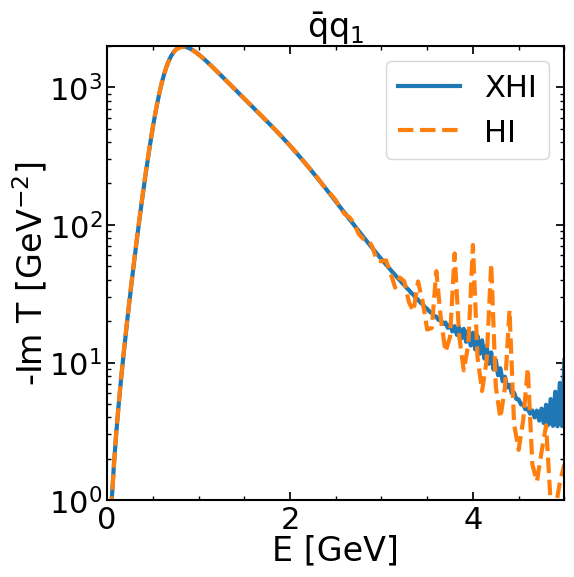

In [62]:
plt.plot(erange, -imag(df1['TM']['qa1']['0'][:, 0]), ls='-', label='XHI')
plt.plot(erange2, -imag(df2['TM']['qa1']['0'][:, 0]), label='HI', ls='--')

plt.semilogy()
plt.xlim(0, 5)
plt.ylim(1, 2000)

plt.xlabel('E [GeV]')
plt.ylabel(r'-Im T [GeV$^{-2}$]')

plt.legend()
plt.title(r'$\bar q q_1$')
plt.savefig('ImT.pdf', bbox_inches='tight')

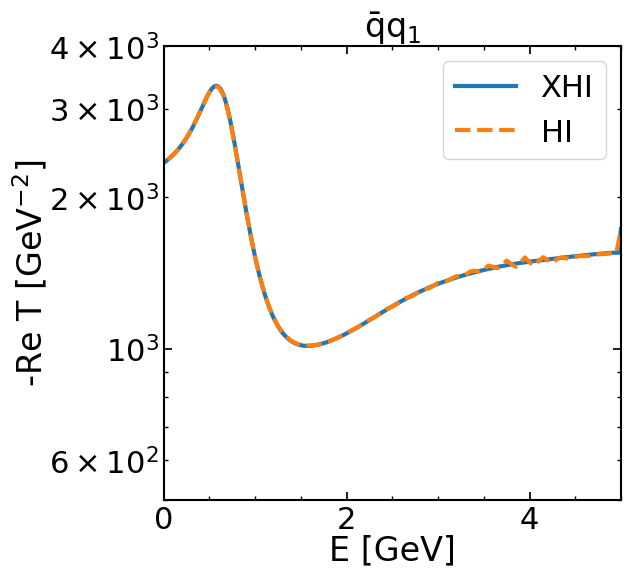

In [63]:
plt.plot(erange, -real(df1['TM']['qa1']['0'][:, 0]), ls='-', label='XHI')
plt.plot(erange2, -real(df2['TM']['qa1']['0'][:, 0]), label='HI', ls='--')

plt.semilogy()
plt.xlim(0, 5)
plt.ylim(500, 4000)

plt.xlabel('E [GeV]')
plt.ylabel(r'-Re T [GeV$^{-2}$]')

plt.legend()
plt.title(r'$\bar q q_1$')
plt.savefig('ReT.pdf', bbox_inches='tight')

In [64]:
e_plot = 3.
i2 = argmin(abs(ch2.erange - e_plot))
i1 = argmin(abs(ch1.erange - e_plot))
i1, i2

(320, 160)

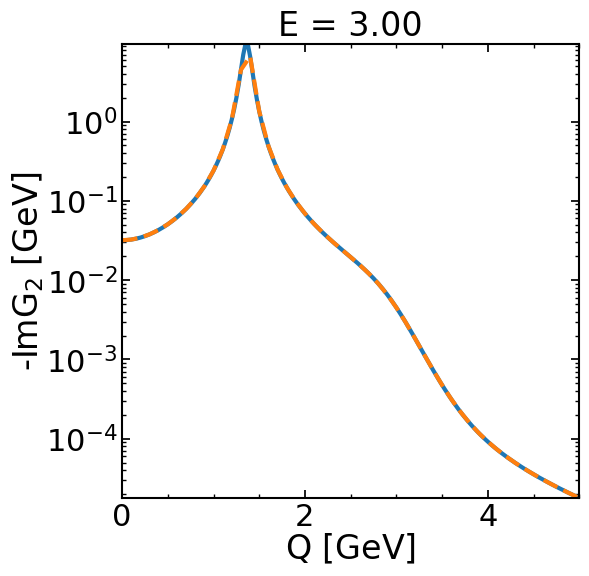

In [65]:
plt.plot(ch1.qrange, -imag(ch1.G2[i1, :]))
plt.plot(ch2.qrange, -imag(ch2.G2[i2, :]), ls='--')
# plt.ylim(0, 1)

plt.ylabel(r'-Im$G_2$ [GeV]')
plt.xlabel(r'$Q$ [GeV]')

plt.title('E = %.2f'%e_plot)

plt.semilogy()

plt.savefig('ImG2_E=%.2f.pdf'%e_plot, bbox_inches='tight')

In [68]:
import tqdm

In [69]:
tqdm.gui.tqdm

<module 'tqdm' from '/home/const/.local/lib/python3.11/site-packages/tqdm/__init__.py'>

In [76]:
ress = array([tm.ReG2_pole(e_plot, q, T, pt1.R, pt2.R, 5) for q in tqdm.tqdm(qrange1)])

100%|████████████████████████████████████████████████████████████████████████████| 201/201 [00:01<00:00, 117.38it/s]


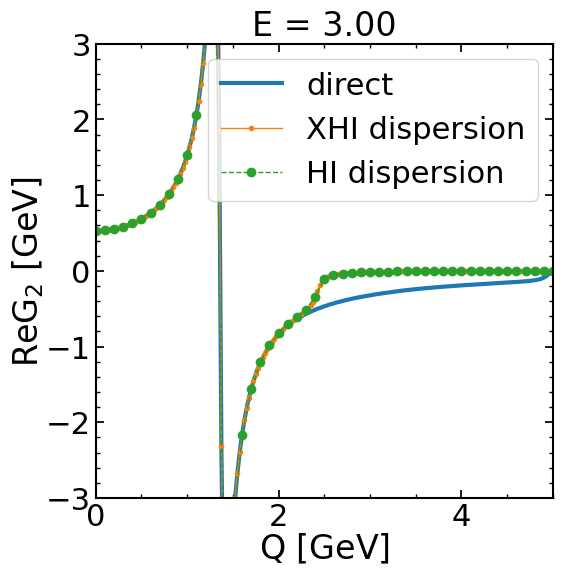

In [77]:
plt.plot(qrange1, -ress, label='direct')

plt.plot(ch1.qrange, real(ch1.G2[i1, :]), marker='.', lw=1, label='XHI dispersion')
plt.plot(ch2.qrange, real(ch2.G2[i2, :]), ls='--', marker='o', lw=1, label='HI dispersion')

plt.ylim(-3, 3)
plt.ylabel(r'Re$G_2$ [GeV]')
plt.xlabel(r'$Q$ [GeV]')

plt.title('E = %.2f'%e_plot)
plt.legend()
plt.savefig('ReG2_E=%.2f.pdf'%e_plot, bbox_inches='tight')

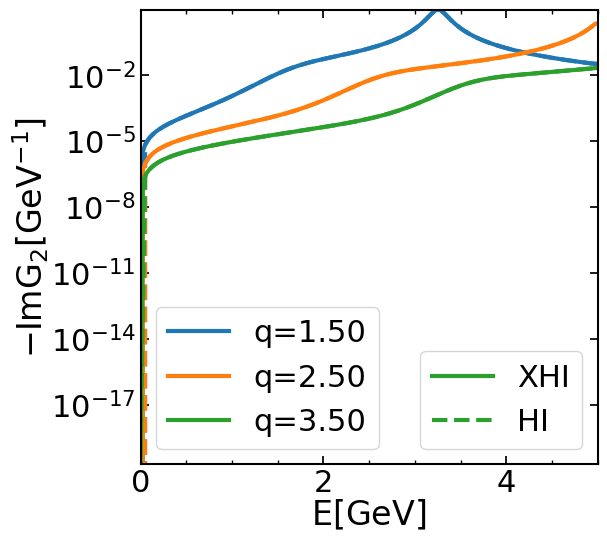

In [78]:
q_plots = [1.5, 2.5, 3.5]
lines = []
for q_plot in q_plots: 
    iq2 = argmin(abs(qrange2 - q_plot))
    iq1 = argmin(abs(qrange1 - q_plot))
    iq1, iq2
    
    l, = plt.plot(ch1.erange, -imag(ch1.G2[:, iq1]))
    l2, = plt.plot(ch2.erange, -imag(ch2.G2[:, iq2]), c=l.get_c(), ls='--')
    lines += [l]

leg = plt.legend([l, l2], ['XHI', 'HI'], loc='lower right')

plt.legend(lines, ['q=%.2f'%q for q in q_plots], loc='lower left')
plt.gca().add_artist(leg)

plt.semilogy() 
plt.xlim(0, 5)

plt.ylabel('$-Im G_2 [GeV^{-1}$]')
plt.xlabel(r'$E [GeV]$')

plt.savefig('ImG2_q.pdf', bbox_inches='tight')

Text(0.5, 0, '$E [GeV]$')

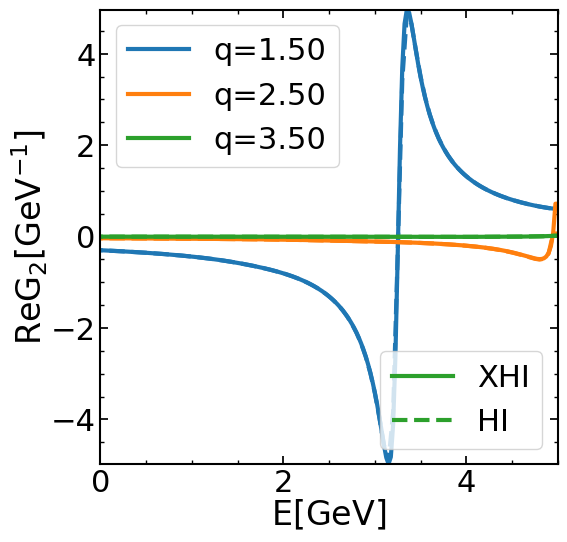

In [79]:
q_plots = [1.5, 2.5, 3.5]
lines = []
for q_plot in q_plots: 
    iq2 = argmin(abs(qrange2 - q_plot))
    iq1 = argmin(abs(qrange1 - q_plot))
    iq1, iq2
    
    l, = plt.plot(ch1.erange, real(ch1.G2[:, iq1]))
    l2, = plt.plot(ch2.erange, real(ch2.G2[:, iq2]), c=l.get_c(), ls='--')
    lines += [l]

leg = plt.legend([l, l2], ['XHI', 'HI'], loc='lower right')

plt.legend(lines, ['q=%.2f'%q for q in q_plots])
plt.gca().add_artist(leg)

# plt.semilogy() 
plt.xlim(0, 5)

plt.ylabel('$Re G_2 [GeV^{-1}$]')
plt.xlabel(r'$E [GeV]$')

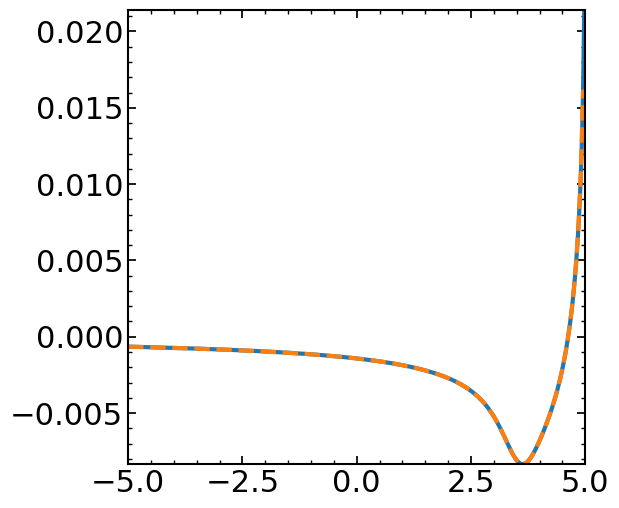

In [80]:
plt.plot(ch1.erange, real(ch1.G2[:, iq1]))
plt.plot(ch2.erange, real(ch2.G2[:, iq2]), ls='--')

# plt.semilogy()

## Checking the thermodynamics sensitivity

In [81]:
th1_0 = h5py.File(os.path.join(folder, '%.2f/th_data_single_%s.hdf5'%(0, Tkeys[i_T])))
th2_0 = h5py.File(os.path.join(folder2, '%.2f/th_data_single_%s.hdf5'%(0, Tkeys[i_T])))

In [82]:
th1 = h5py.File(os.path.join(folder, '%.2f/th_data_single_%s.hdf5'%(murange[i], Tkeys[i_T])))
th2 = h5py.File(os.path.join(folder2, '%.2f/th_data_single_%s.hdf5'%(murange[i], Tkeys[i_T])))

In [83]:
T = Trange[i_T]

In [84]:
th1.attrs['Ptot']/T**4, th2.attrs['Ptot']/T**4

(array([0.85146217]), array([0.85285615]))

In [85]:
th1.attrs['Ptot']/T**4 - th2.attrs['Ptot']/T**4

array([-0.00139398])

In [86]:
th1_0.attrs['Ptot']/T**4, th2_0.attrs['Ptot']/T**4

(array([0.85146217]), array([0.85285615]))

In [87]:
th1_0.attrs['Ptot']/T**4 - th2_0.attrs['Ptot']/T**4

array([-0.00139398])

In [88]:
(th1.attrs['Ptot'] - th1_0.attrs['Ptot']) /T**4, (th2.attrs['Ptot']/T**4 - th2_0.attrs['Ptot']/T**4)

(array([0.]), array([0.]))

In [89]:
th1.attrs['P_Q_Q']/T**4, th2.attrs['P_Q_Q']/T**4

(array([1.21481829]), array([1.22281394]))

In [90]:
th1.attrs['P_S_Q']/T**4, th2.attrs['P_S_Q']/T**4

(array([-1.01261834]), array([-1.02200801]))

In [91]:
th1.attrs.keys()

<KeysViewHDF5 ['P_Phi', 'P_Phi_A', 'P_Phi_G', 'P_Phi_Q', 'P_Q_A', 'P_Q_Q', 'P_S_A', 'P_S_Q', 'Ptot']>

In [92]:
(th1.attrs['P_S_Q'] + th1.attrs['P_Q_Q'])/T**4, (th2.attrs['P_S_Q'] + th2.attrs['P_Q_Q'])/T**4

(array([0.20219995]), array([0.20080593]))

In [93]:
(th1.attrs['P_S_A'] + th1.attrs['P_Q_A'])/T**4, (th2.attrs['P_S_A'] + th2.attrs['P_Q_A'])/T**4

(array([0.20219995]), array([0.20080593]))

In [94]:
th1.attrs['P_Phi_Q']/T**4, th2.attrs['P_Phi_Q']/T**4

(array([0.22353114]), array([0.22562215]))

In [95]:
th1.attrs['P_Phi_A']/T**4, th2.attrs['P_Phi_A']/T**4

(array([0.22353114]), array([0.22562215]))

In [96]:
(th1.attrs['P_S_A'] + th1.attrs['P_Q_A'] + th1.attrs['P_S_Q'] + th1.attrs['P_Q_Q'] + th1.attrs['P_Phi_A'] + th1.attrs['P_Phi_Q'])/T**4

array([0.85146217])

In [97]:
(th2.attrs['P_S_A'] + th2.attrs['P_Q_A'] + th2.attrs['P_S_Q'] + th2.attrs['P_Q_Q'] + th2.attrs['P_Phi_A'] + th2.attrs['P_Phi_Q'])/T**4

array([0.85285615])

## Recalculate the QP pressure

In [98]:
Nf = 3
Nc = 3
Ns = 2

In [99]:
iImG1 = tm.Interpolator2D(qrange1, erange, ascontiguousarray(array(imag(df1['Q']['G']))))
iReG1 = tm.Interpolator2D(qrange1, erange, ascontiguousarray(array(real(df1['Q']['G']))))

iImG2 = tm.Interpolator2D(qrange2, erange2, ascontiguousarray(array(imag(df2['Q']['G']))))
iReG2 = tm.Interpolator2D(qrange2, erange2, ascontiguousarray(array(real(df2['Q']['G']))))

In [100]:
th1.attrs['P_Q_Q']/T**4

array([1.21481829])

In [101]:
pq1 = tm.OmQ_F(T, iImG1, iReG1)
Nf * Nc * Ns * pq1 / T**4

1.2199242795994734

In [102]:
pq2 = tm.OmQ_F(T, iImG2, iReG2)
Nf * Nc * Ns * pq2 / T**4

1.2695297855209553

In [103]:
iImG1_1 = tm.InterDenom2D(qrange1, erange, ascontiguousarray(real(1/array(df1['Q']['G']))), 
                          ascontiguousarray(imag(1/array(df1['Q']['G']))), 
                         'imag')
iReG1_1 = tm.InterDenom2D(qrange1, erange, ascontiguousarray(real(1/array(df1['Q']['G']))), 
                          ascontiguousarray(imag(1/array(df1['Q']['G']))), 
                         'real')

iImG2_1 = tm.InterDenom2D(qrange2, erange2, ascontiguousarray(real(1/array(df2['Q']['G']))), 
                          ascontiguousarray(imag(1/array(df2['Q']['G']))), 
                         'imag')
iReG2_1 = tm.InterDenom2D(qrange2, erange2, ascontiguousarray(real(1/array(df2['Q']['G']))), 
                          ascontiguousarray(imag(1/array(df2['Q']['G']))), 
                         'real')

[]

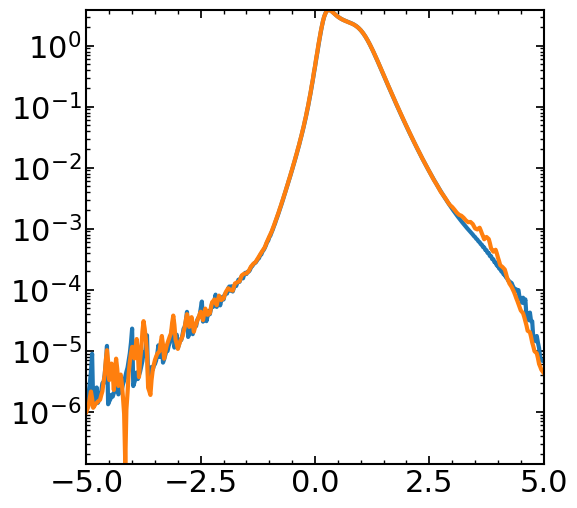

In [104]:
# plt.plot(erange, [iImG1_1(e, 0) for e in erange])
plt.plot(erange, [-iImG1(0, e) for e in erange])
plt.plot(erange, [-iImG2(0, e) for e in erange])
# plt.plot(erange, ascontiguousarray(array(imag(df1['Q']['G'])))[:, 0])
plt.semilogy()

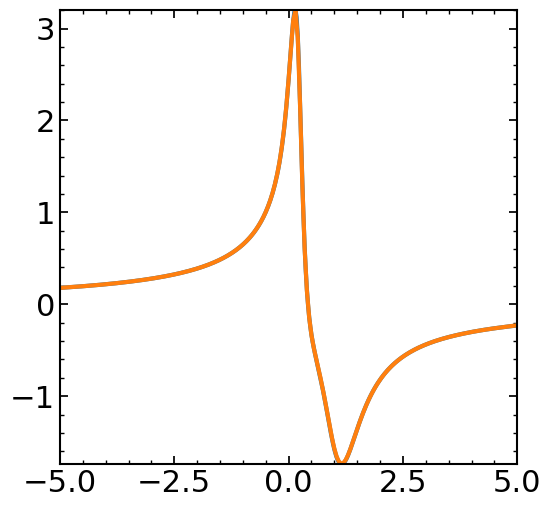

In [105]:
plt.plot(erange, [-iReG1(0, e) for e in erange])
plt.plot(erange, [-iReG2(0, e) for e in erange])

In [106]:
pq1_1 = tm.OmQ_F(T, iImG1_1, iReG1_1)
Nf * Nc * Ns * pq1_1 / T**4

1.2155801625926017

In [107]:
pq2_1 = tm.OmQ_F(T, iImG2_1, iReG2_1)
Nf * Nc * Ns * pq2_1 / T**4

1.2308399642525885

In [108]:
pq1_2 = tm.OmQ_F_adaptive(T, iImG1_1, iReG1_1)
Nf * Nc * Ns * pq1_1 / T**4

1.2155801625926017

### Cut the negative-energy region

In [109]:
ecut = -2

In [110]:
G1_cut = array(df1['Q']['G'])
G1_cut[erange < ecut] = real(G1_cut[erange < ecut])

G2_cut = array(df2['Q']['G'])
G2_cut[erange2 < ecut] = real(G2_cut[erange2 < ecut])

[]

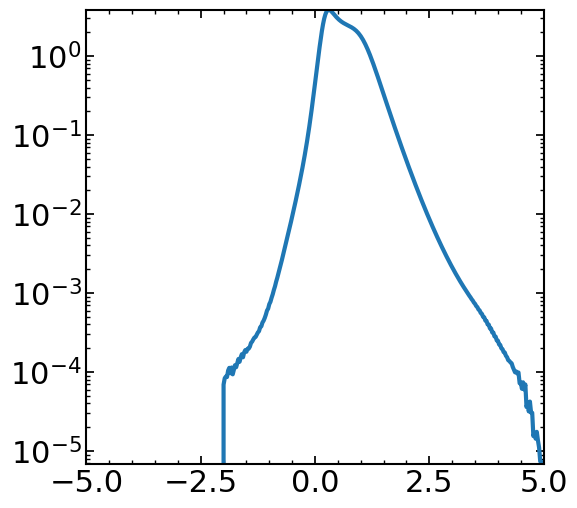

In [111]:
plt.plot(erange, -imag(G1_cut[:, 0]))

plt.semilogy()

In [112]:
iImG1_cut = tm.InterDenom2D(qrange1, erange, ascontiguousarray(real(1/G1_cut)), 
                          ascontiguousarray(imag(1/G1_cut)), 
                         'imag')
iReG1_cut = tm.InterDenom2D(qrange1, erange, ascontiguousarray(real(1/G1_cut)), 
                          ascontiguousarray(imag(1/G1_cut)), 
                         'real')

In [113]:
iImG2_cut = tm.InterDenom2D(qrange2, erange2, ascontiguousarray(real(1/G2_cut)), 
                          ascontiguousarray(imag(1/G2_cut)), 
                         'imag')
iReG2_cut = tm.InterDenom2D(qrange2, erange2, ascontiguousarray(real(1/G2_cut)), 
                          ascontiguousarray(imag(1/G2_cut)), 
                         'real')

In [114]:
pq1_cut = tm.OmQ_F(T, iImG1_cut, iReG1_cut)
Nf * Nc * Ns * pq1_cut / T**4

1.1717845861474088

In [572]:
pq2_cut = tm.OmQ_F(T, iImG2_cut, iReG2_cut)
Nf * Nc * Ns * pq2_cut / T**4

1.1759749904181573

## Recalculate the $\Phi$

### Inspect the LogT

In [123]:
th1.keys()

<KeysViewHDF5 ['LogS', 'LogT']>

[]

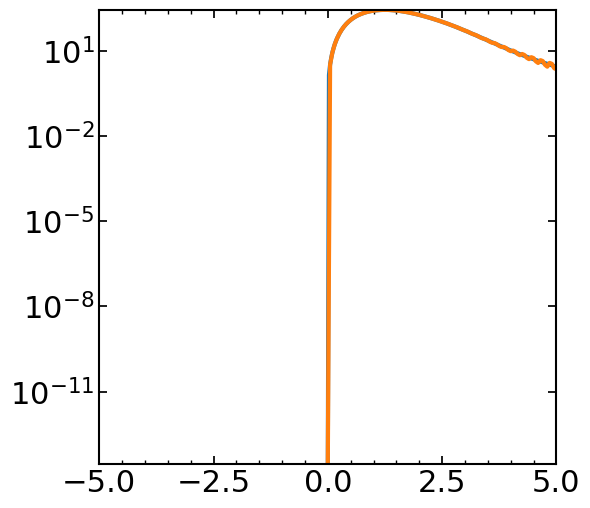

In [128]:
plt.plot(erange, -imag(th1['LogT']['qa1']['0'][:, 0]))
plt.plot(erange2, -imag(th2['LogT']['qa1']['0'][:, 0]))
plt.semilogy()

In [133]:
th1['LogS'].keys()

<KeysViewHDF5 ['AA', 'AQ', 'QA', 'QQ']>

[]

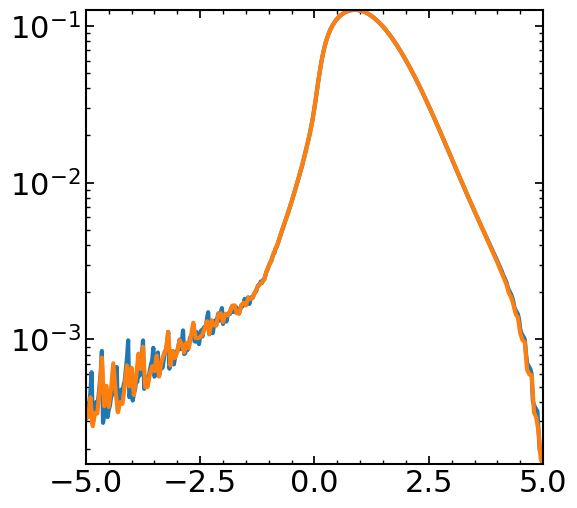

In [134]:
plt.plot(erange, -imag(th1['LogS']['QQ'][:, 0]))
plt.plot(erange2, -imag(th2['LogS']['QQ'][:, 0]))
plt.semilogy()

### Recalculate pressure with one TM

In [83]:
qrange1 = df1.attrs['qrange']
qrange2 = df2.attrs['qrange']

In [84]:
mQ = df1.attrs['mQ']
eps1 = sqrt(mQ**2 + qrange1**2)
eps2 = sqrt(mQ**2 + qrange2**2)

In [ ]:
plt.plot()